In [5]:
#Predict a student’s final exam score based on study habits.

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [163]:
df=pd.read_csv("Student_Performance.csv")

In [164]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

array([[<Axes: title={'center': 'student_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'study_hours'}>],
       [<Axes: title={'center': 'attendance_percentage'}>,
        <Axes: title={'center': 'math_score'}>,
        <Axes: title={'center': 'science_score'}>],
       [<Axes: title={'center': 'english_score'}>,
        <Axes: title={'center': 'overall_score'}>, <Axes: >]],
      dtype=object)

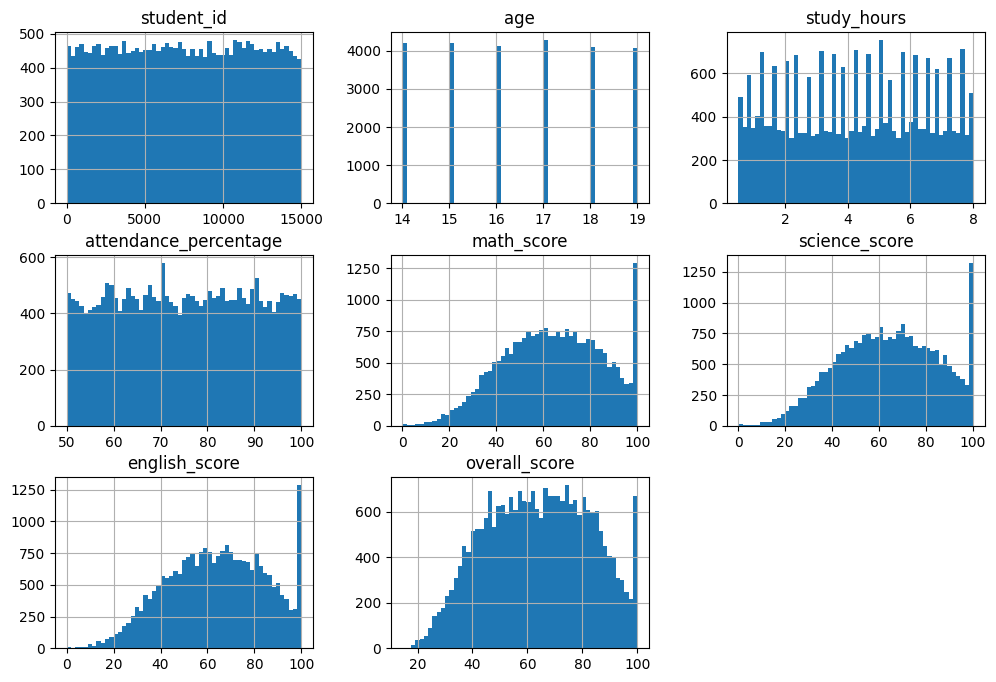

In [166]:
df.hist(bins=55, figsize=(12,8))

# Creating a TestSet

In [171]:
X = df.drop(
    ["student_id", "overall_score", "final_grade"],
    axis=1
)
y=df["overall_score"]

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [174]:
X_train.shape, X_test.shape


((20000, 13), (5000, 13))

# Creating pipeline and Training

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression


In [176]:
num_att=["age","study_hours","attendance_percentage"]
cat_att = X_train.drop(num_att, axis=1).columns.tolist()

In [177]:
num_pipeline=Pipeline([
    ("scaler",StandardScaler())
])

cat_pipeline=Pipeline([
    ("encoder",OneHotEncoder(handle_unknown="ignore"))
])
preprocessor=ColumnTransformer([
    ("num",num_pipeline,num_att),
    ("cat",cat_pipeline,cat_att)
])
model_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
   
])

In [178]:
fit_data=model_pipeline.fit(X_train,y_train)

In [179]:
y_pred=model_pipeline.predict(X_test)

# Evaluating the model

In [180]:
from sklearn.metrics import mean_squared_error,r2_score

In [181]:
lin_rmse = mean_squared_error(y_test, y_pred)

In [182]:
print(lin_rmse)

18.393919483637127


In [183]:
rmse=np.sqrt(lin_rmse)

In [184]:
r2=r2_score(y_test,y_pred)

In [185]:
print(r2)

0.9493379880960916


# Visualization

***Actual vs Predicted Plot***

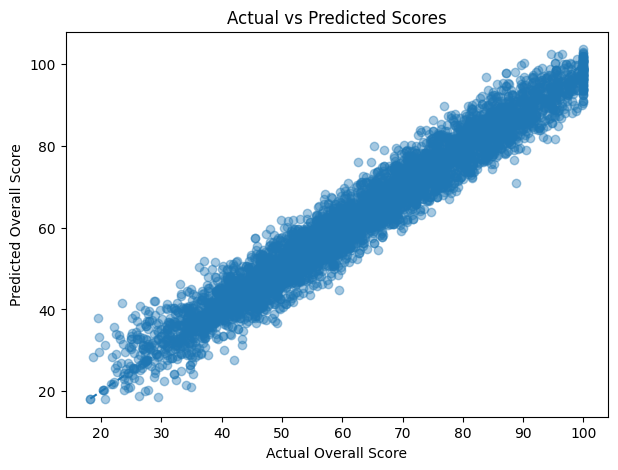

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Overall Score")
plt.ylabel("Predicted Overall Score")
plt.title("Actual vs Predicted Scores")
plt.show()


***Residual Plot***

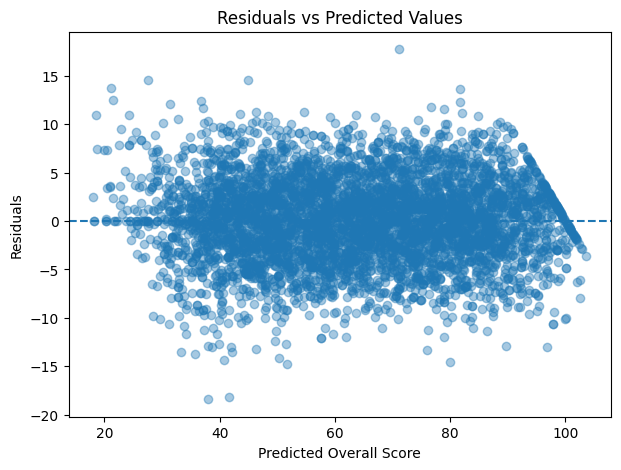

In [159]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Overall Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
